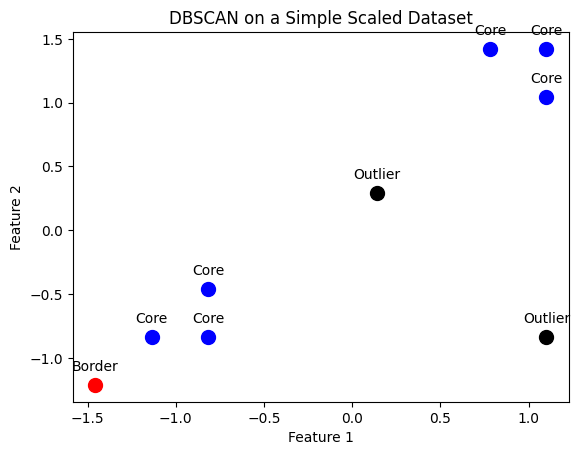

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Create a simple dataset with points grouped into clusters
X = np.array([[1, 2], [2, 2], [2, 3],    # Cluster 1
              [8, 7], [8, 8], [7, 8],    # Cluster 2
              [0, 1], [5, 5], [8, 2]])   # Cluster 3 and a likely outlier

# Scale the dataset to normalize the feature scale
X = StandardScaler().fit_transform(X)

# Initialize and fit the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
labels = db.labels_

# Boolean array indicating whether each sample is a core point
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Prepare colors and figure
fig, ax = plt.subplots()

# Plot each point and annotate
for i, (x, y) in enumerate(X):
    if labels[i] == -1:
        # If the label is -1, the point is considered noise (outlier)
        plt.scatter(x, y, s=100, color='black')  # Noise points colored black
        ax.annotate('Outlier', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    elif core_samples_mask[i]:
        # Core points are those with True in core_samples_mask
        plt.scatter(x, y, s=100, color='blue')  # Core points colored blue
        ax.annotate('Core', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        # Points that are not core and not noise are border points
        plt.scatter(x, y, s=100, color='red')  # Border points colored red
        ax.annotate('Border', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('DBSCAN on a Simple Scaled Dataset')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()
